In [1]:
from src.cv.pytorch.data_loader.facial_keypoints import FacialKeypointDataLoader
from src.cv.pytorch.models.configs import ModelTrainingConfig
from src import CURRENT_ROOT_DIR

#### Download data from Kaggle

In [2]:
from kaggle_utils.src import KaggleDataApi

In [3]:
kda = KaggleDataApi(call_path = CURRENT_ROOT_DIR)
kda.download_kaggle_dataset(dataset_name="facial_keypoints_detection")

File downloaded and saved to:   c:\users\sankr\documents\projects\git_work\experiments\data\facial-keypoints-detection.zip


In [4]:
kda.unzip_and_return_folder_details()

('c:\\users\\sankr\\documents\\projects\\git_work\\experiments\\data\\facial-keypoints-detection',
 ['IdLookupTable.csv', 'SampleSubmission.csv', 'test.zip', 'training.zip'])

In [7]:
for file_name in ["test.zip", "training.zip"]:
    complete_path = os.path.join(root_folder, file_name)
    with zipfile.ZipFile(complete_path, 'r') as zip_ref:
        zip_ref.extractall(root_folder)

#### Pre-process test and train images to store as images and annotation

In [1]:
root_folder = "c:\\users\\sankr\\documents\\projects\\git_work\\experiments\\data\\facial-keypoints-detection"
import os
import zipfile
import pandas as pd
import numpy as np

In [2]:
os.listdir(root_folder)

['IdLookupTable.csv',
 'SampleSubmission.csv',
 'test.csv',
 'test.zip',
 'training',
 'training.csv',
 'training.zip']

In [3]:
annotation_file = os.path.join(root_folder, "IdLookupTable.csv")
submission_file = os.path.join(root_folder, "SampleSubmission.csv")
test_data = os.path.join(root_folder, "test.csv")
train_data = os.path.join(root_folder, "training.csv")

In [4]:
os.makedirs(os.path.join(root_folder, train_data.replace("csv", "")), exist_ok =True)
os.makedirs(os.path.join(root_folder, test_data.replace("csv", "")), exist_ok = True)

In [5]:
from PIL import Image

In [30]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv(train_data)

In [34]:
df["Image"] = df.Image.apply(lambda x: np.array(x.split(" "), dtype="float"))
df["Image"] = df.Image.apply(lambda pixel: pixel.reshape(96, 96, 1))
df["Image"] = df.Image.apply(lambda pixel: pixel/255)

In [35]:
images = df.pop("Image")

In [36]:
df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [37]:
images[0]

array([[[0.93333333],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98039216],
        [0.98039216],
        [0.98039216]],

       [[0.92156863],
        [0.93333333],
        [0.9254902 ],
        ...,
        [0.97647059],
        [0.98039216],
        [0.98431373]],

       [[0.92941176],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98431373],
        [0.98431373],
        [0.98039216]],

       ...,

       [[0.72941176],
        [0.71764706],
        [0.70980392],
        ...,
        [0.20392157],
        [0.22352941],
        [0.23529412]],

       [[0.74117647],
        [0.7372549 ],
        [0.81176471],
        ...,
        [0.23921569],
        [0.27058824],
        [0.30588235]],

       [[0.74901961],
        [0.72156863],
        [0.72156863],
        ...,
        [0.2745098 ],
        [0.29411765],
        [0.35294118]]])

In [31]:
isinstance(images[0], np.ndarray)

True

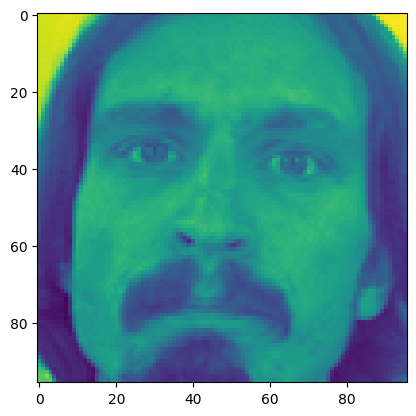

In [11]:
from matplotlib import pyplot as plt

plt.imshow(images[0])

In [16]:
images[0].shape

(9216,)

3072

In [24]:
cv2.cvtColor(images[0], cv2.COLOR_RGB2GRAY)/255

error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x73cf019b::Set<1,-1,-1>,struct cv::impl::A0x73cf019b::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [2]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [3]:
fkdl = FacialKeypointDataLoader(
    dataset_name="faces", 
    img_dir=r"data/facial-keypoints-detection", 
    annotation_file=r"data/facial-keypoints-detection/IdLookupTable.csv")


In [7]:
len(fkdl)

69

In [2]:
# Initial config for training
config = ModelTrainingConfig(
    lr=0.01, batch_size=256, epochs=50, train_size=0.8, test_size=0.2
)

In [7]:
batch_size = 10
train_loader = DataLoader(
    fkdl, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

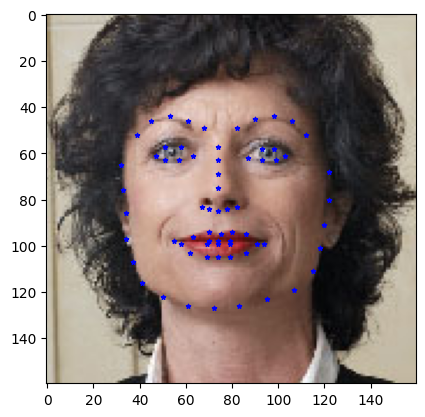

In [8]:
fkdl.show_key_points_on_images(65)

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as I
import torch.optim as optim
from abc import abstractmethod
from typing import Tuple, Optional, List, Dict

In [11]:
from abc import abstractmethod

In [12]:
class VanillaCNN(nn.Module):
    def __init__(self):
        
        super(VanillaCNN, self).__init__()
        self._net = list()
        self._cnn_call_iteration = 0
        self._dropout_call_iteration = 0
        self._linear_call_iteration = 0
        
    def _load_model_from_disk(self, model_path: str):
        pass
    
    def _save_mode_to_disk(self, model_path: str):
        pass
        
    def single_cnn_activation_step(
        self, 
        input_channels: int, 
        output_channels: int, 
        kernel_size: Tuple[int, int],
        add_max_pool: bool = False,
        pool_size: Optional[Tuple[int, int]] = None,
        
    ):
        
        """
        Args:
            input_channel: 
            output_channel: 
            kernel_size
        """
        
        # TODO - add validation on input
        # TODO - count number of GPU and use pipeline for more than one
        # TODO - add stride, padding etc
        self._cnn_call_iteration += 1
        print(input_channels, output_channels, kernel_size)
        conv_layer = nn.Conv2d(
                in_channels=input_channels, 
                out_channels=output_channels, kernel_size=kernel_size)
        self._net.append((f"conv2d{self._cnn_call_iteration}", conv_layer))
        
        setattr(self, f"conv2d{self._cnn_call_iteration}", conv_layer)
        
        if add_max_pool:
            if not pool_size:
                 raise ValueError("The pool size cannot be zero ")
            pool_layer = nn.MaxPool2d(kernel_size=pool_size)
            self._net.append((f"max_pool2d{self._cnn_call_iteration}", pool_layer))
            setattr(self, f"max_pool2d{self._cnn_call_iteration}", pool_layer)
            
            
    def add_dropout(self, dropout_threshold):
        self._dropout_call_iteration += 1
        dropout_layer = nn.Dropout(dropout_threshold)
        self._net.append((f"dropout{self._dropout_call_iteration}", dropout_layer))
        setattr(self, f"dropout{self._dropout_call_iteration}", dropout_layer)
        
    def add_linear_layer(self, in_features, out_features, learn_additive_bias=True):
        """
        """
        linear_layer = nn.Linear(in_features=in_features, out_features=out_features, bias=learn_additive_bias)
        self._linear_call_iteration += 1
        self._net.append(
            (f"linear{self._linear_call_iteration}", linear_layer)
        )
        setattr(self, f"linear{self._linear_call_iteration}",linear_layer)
        
    def forward(self, sample):
        
        flattening_done = False
        for idx, item in enumerate(self._net):
            (call_type, callable_f)  = item
            
            flatten_condition = (
                not flattening_done and 
                (
                    "linear" in call_type or 
                    "dropout" in call_type and len(self._net) - idx in {1, 2}
                )
            )
            
            if flatten_condition:
                print("Input size before flattening:", sample.size())
                flattening_done = True
                
                sample = sample.view(sample.size(0), -1)
                
            sample = callable_f(sample)
            if "conv" in call_type:
                
                sample = F.relu(sample)
                
        return sample  
    
    @abstractmethod
    def initialize_optimization_parameters(self, lr) -> Dict:
        """
        
        """
        
        raise NotImplementedError

In [13]:
class FacialKeypointVCNN(VanillaCNN):
    
    def __init__(
        self, 
        cnn_layers: int, 
        input_channel: List[int], 
        output_channels: List[int], 
        kernel_size: List[Tuple[int]],
        load_from_file: bool= False,
        file_path: Optional[str] = None
    ):
        
        super().__init__()
        
        if not load_from_file:
            for i in range(cnn_layers):
                if i == 0:
                    input_channel = input_channel
                else:
                    input_channel = output_channels[i-1]


                self.single_cnn_activation_step(
                    input_channels=input_channel, 
                    output_channels=output_channels[i], 
                    kernel_size=kernel_sizes[i],
                    add_max_pool=True,
                    pool_size=(2,2),        
                )

            self.add_dropout(0.2)
            self.add_linear_layer(
                128*26*26, 136
            )
            
        else:
            if not file_path:
                raise ValueError(
                    "Arg file_path should be provided with load_ffrom_file = True"
                )
            self._load_model_from_disk(file_path)
        
        
    def initialize_optimization_parameters(self, lr=0.0005) -> Dict:
        
        optimization_functions = dict()
        optimization_functions["criterion"] = nn.MSELoss()
        optimization_functions["optimizer"] = optim.Adam(
            self.parameters(), lr=lr
        )
        
        return optimization_functions
        
#     def fit_model(self, n_epochs):
        
#         self.train()
#         for epoch in range(n_epochs):  # loop over the dataset multiple times
#             running_loss = 0.0
#             for batch_i, data in enumerate(train_loader):
#                 # get the input images and their corresponding labels
#                 images = data['image']
#                 keypoints = data['facial_landmarks']
#                 # flatten pts
#                 keypoints = keypoints.view(keypoints.size(0), -1)
#                 # convert variables to floats for regression loss
#                 keypoints = keypoints.type(torch.FloatTensor)
#                 images = images.type(torch.FloatTensor)
#                 # forward pass to get outputs
#                 output_pts = self(images)
#                 # calculate the loss between predicted and target keypoints
#                 loss = criterion(output_pts, key_pts)
#                 # zero the parameter (weight) gradients
#                 optimizer.zero_grad()
#                 # backward pass to calculate the weight gradients
#                 loss.backward()
#                 # update the weights
#                 optimizer.step()
#                 # print loss statistics
#                 running_loss += loss.item()
#                 if batch_i % 10 == 9:    # print every 10 batches
#                     print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
#                     running_loss = 0.0
#         print('Finished Training')
        
        

In [14]:
cnn_layers = 3
input_channels = 1
output_channels = [32, 64, 128]
kernel_sizes = [(5,5), (3,3), (3,3)]
fk_vcnn = FacialKeypointVCNN(cnn_layers, input_channels, output_channels, kernel_sizes).to(device)

print(fk_vcnn)

1 32 (5, 5)
32 64 (3, 3)
64 128 (3, 3)
FacialKeypointVCNN(
  (conv2d1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (max_pool2d1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2d2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2d2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2d3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2d3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (linear1): Linear(in_features=86528, out_features=136, bias=True)
)


In [15]:
def fit_model(n_epochs):
        
    fk_vcnn.train()
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image'].to(device)
            keypoints = data['facial_landmarks'].to(device)
            # flatten pts
            keypoints = keypoints.view(keypoints.size(0), -1)
            # convert variables to floats for regression loss
            keypoints = keypoints.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)
            # forward pass to get outputs
            output_pts = fk_vcnn(images.to(device))
            # calculate the loss between predicted and target keypoints
            optimization_functions = fk_vcnn.initialize_optimization_parameters()
            loss = optimization_functions["criterion"](output_pts.to(device), keypoints.to(device))
            # zero the parameter (weight) gradients
            optimization_functions["optimizer"].zero_grad()
            # backward pass to calculate the weight gradients
            loss.backward()
            # update the weights
            optimization_functions["optimizer"].step()
            # print loss statistics
            running_loss += loss.item()

            if batch_i % 10 == 6:    # print every 7 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0
    print('Finished Training')



In [ ]:
fit_model(100)

Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 1, Batch: 7, Avg. Loss: 9120.9943359375
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 2, Batch: 7, Avg. Loss: 2686.9764404296875
Input size before flattening: torch.Size([10, 128, 26, 26])
Input

Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 18, Batch: 7, Avg. Loss: 1658.7217041015624
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 19, Batch: 7, Avg. Loss: 1639.4047058105468
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
E

Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 36, Batch: 7, Avg. Loss: 2298.2150024414063
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 37, Batch: 7, Avg. Loss: 1831.3736938476563
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
E

Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 54, Batch: 7, Avg. Loss: 1643.1319580078125
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 55, Batch: 7, Avg. Loss: 1847.9797119140626
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
E